# Short Project 2: Porsche Taycan Multiple Regression Models

## Model #1: Use Age and Miles as predictors

### Part (a):

Run the model with two predictors (age and miles) for price as the response variable and provide the output (both the summary and the anova for the model)

In [2]:
taycan = read.csv("Porsche Taycan Data.csv")

attach(taycan)

model1 = lm(Price ~ Age + Miles)
cat("Summary of Model 1:\n")
summary(model1)

cat("\n\nAnova of Model 1:\n")
anova(model1)

Summary of Model 1:



Call:
lm(formula = Price ~ Age + Miles)

Residuals:
   Min     1Q Median     3Q    Max 
-24.78 -10.36  -3.89   6.30  45.38 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 125.0002     6.6659  18.752   <2e-16 ***
Age          -5.7944     2.8239  -2.052    0.050 *  
Miles        -1.3081     0.5785  -2.261    0.032 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.57 on 27 degrees of freedom
Multiple R-squared:  0.5277,	Adjusted R-squared:  0.4927 
F-statistic: 15.08 on 2 and 27 DF,  p-value: 4e-05




Anova of Model 1:


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,7731.301,7731.3013,25.05366,3.001987e-05
Miles,1,1577.702,1577.7017,5.11262,3.201875e-02
Residuals,27,8331.921,308.5897,NA,NA


### Part (b):

Find the residual for the first car in your sample. Show the actual computation for this part, based on your prediction equation and the data for that car.

In [3]:
intercept = 125
beta_age = -5.7944
beta_miles = -1.3081

age1 = Age[1]
miles1 = Miles[1]
price1 = Price[1]

pred1 = intercept + beta_age * age1 + beta_miles * miles1

resid1 = price1 - pred1
cat("The residual for the first car in the sample is", resid1)

The residual for the first car in the sample is -13.64887

### Part (c):

Assess the importance of each of the predictors in the model—be sure to indicate the specific value(s) from the output you are using to make the assessments. Include hypotheses and conclusions in context.

In [4]:
coef(summary(model1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),125.000196,6.6658796,18.752243,5.180949e-17
Age,-5.794375,2.8238724,-2.051925,4.999017e-02
Miles,-1.308122,0.5785309,-2.261110,3.201875e-02


<span style="color: blue;">Hypotheses for each predictor:<span>

<span style="color: blue;">H0: beta j = 0 (no effect on car price)<span>

<span style="color: blue;">Ha: beta j not equal 0 (price depends on predictor)<span>

<span style="color: blue;">Age: Estimate = -5.79437, t = -2.05, p = 0.050. Since p is about 0.05, Age is borderline significant. Holding miles constant, each extra year lowers price by about 5794 dollars.<span>

<span style="color: blue;">Miles: Estimate = -1.31, t = -2.26, p = 0.032. Since p < 0.05, Miles is significant. Each extra 1000 miles lowers price by about 1308 dollars.<span>

<span style="color: blue;">Conclusion: Both predictors are important. Age is only marginally significant, while Miles has a clearer negative effect on price.<span>

### Part (d):

Assess the overall effectiveness of this model (with a formal test). Again, be sure to include hypotheses and the specific value(s) you are using from the output to reach a conclusion.

In [5]:
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,7731.301,7731.3013,25.05366,3.001987e-05
Miles,1,1577.702,1577.7017,5.11262,3.201875e-02
Residuals,27,8331.921,308.5897,NA,NA


<span style="color: blue;">
Hypotheses:

H0: Age and Miles have no effect on car price (all slopes equal 0)

Ha: At least one predictor affects car price

Test statistic and p-value:

Overall F = 25.05

p-value = 0.00003

Conclusion:
Since the p-value is much smaller than 0.05, we reject H0. The model with Age and Miles is statistically significant, so these predictors together explain a meaningful amount of variation in used Taycan prices.    
<span>

<br><br><br><br><br><br>

## Model #2: Polynomial models

One of the drawbacks of the linear model in the original project was the "free car" phenomenon that often occurred where the predicted price is eventually negative as the line decreases for older cars. Let’s see if adding one or more polynomial terms might help with this

### Part (a):

Fit a quadratic model using age to predict price. Give the prediction equation and show a scatterplot of the data with the quadratic fit drawn on it.


Call:
lm(formula = Price ~ Age + I(Age^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-24.758 -12.283  -4.333   6.885  53.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 127.7894    14.4319   8.855  1.8e-09 ***
Age         -14.3093    11.0427  -1.296    0.206    
I(Age^2)      0.6545     1.7272   0.379    0.708    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.11 on 27 degrees of freedom
Multiple R-squared:  0.4412,	Adjusted R-squared:  0.3998 
F-statistic: 10.66 on 2 and 27 DF,  p-value: 0.0003869


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,7731.30128,7731.30128,21.1769303,0.000088789
I(Age^2),1,52.42764,52.42764,0.1436054,0.707686556
Residuals,27,9857.19514,365.08130,NA,NA


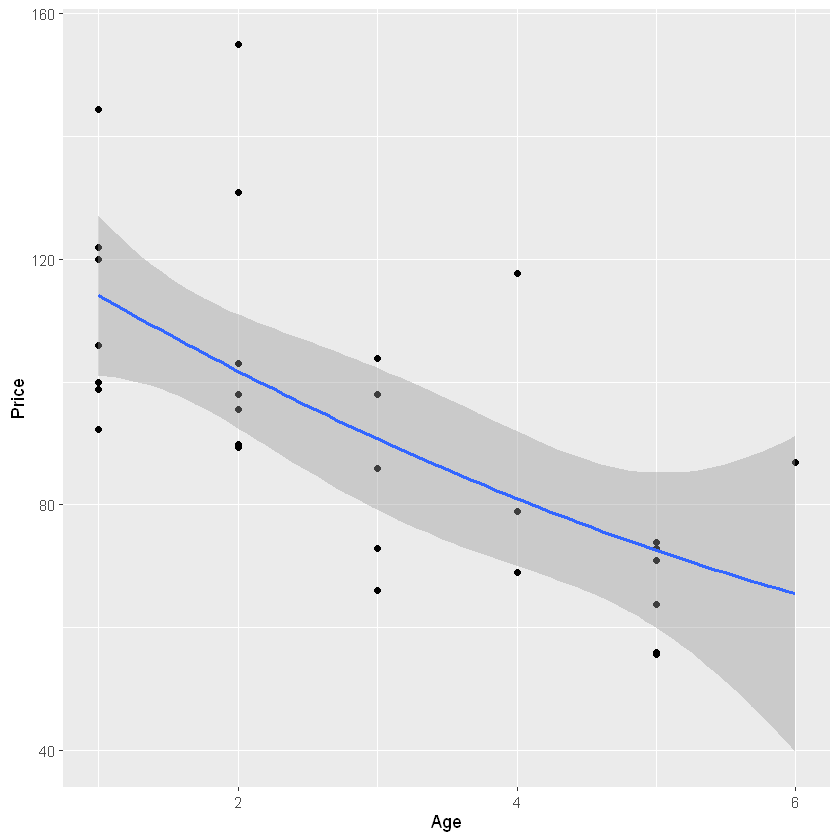

In [6]:
model2_quad = lm(Price ~ Age + I(Age^2))
summary(model2_quad)
anova(model2_quad)

library(ggplot2)
ggplot(taycan, aes(x=Age, y=Price)) + geom_point() + 
stat_smooth(method="lm", formula = y ~ poly(x,2), se=TRUE)

### Part (b):

Does the quadratic model allow for some age where a car has a zero or negative predicted price? Justify your answer using a calculation or graph.

In [7]:
coefs2 = coef(model2_quad)
a = coefs2["I(Age^2)"]
b = coefs2["Age"]
c = coefs2["(Intercept)"]
roots = polyroot(c(c, b, a))
roots_real = roots[abs(Im(roots)) < 1e-8]
roots
as.numeric(roots_real)

[1] 10.93074+8.703666i 10.93074-8.703666i

numeric(0)

<span style="color: blue;">The quadratic model has no real solutions for when the predicted price equals zero. The roots of the equation are 10.93 ± 8.70i, which are complex numbers. Since age can't be complex, this means the quadratic curve never crosses the x axis. Thus, according to this model, the predicted car price never reaches zero.<span>

### Part (c):

What happens in the quadratic model for cars that are very old? Can you think of a plausible explanation for this, or is it a flaw of the quadratic model?

In [8]:
newages = data.frame(Age = seq(0, 200, by=1))
newpreds = predict(model2_quad, newdata=newages)
data.frame(Age=newages$Age, Predicted=newpreds)[c(1, length(newpreds), 
                                                which.min(newpreds)), ]

,Age,Predicted
,<dbl>,<dbl>
1,0,127.78940
201,200,23447.60473
12,11,49.58715


<span style="color: blue;">For very old cars, the quadratic model produces unrealistic predictions. For example, at Age = 200 years the predicted price is over 23 million dollars. Obviously, used cars can't appreciate that much as they get older. This shows that the quadratic model bends upward as age increases, which is a flaw of the quadratic model.<span>

### Part (d):

Would the fit improve significantly if you also included a cubic term? Justify your answer.

In [9]:
model2_cubic = lm(Price ~ poly(Age,3, raw=TRUE), data=taycan)
summary(model2_cubic)
anova(model2_quad, model2_cubic)


Call:
lm(formula = Price ~ poly(Age, 3, raw = TRUE), data = taycan)

Residuals:
   Min     1Q Median     3Q    Max 
-25.76 -12.27  -5.43   5.93  48.03 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)                 95.146     27.639   3.442  0.00196 **
poly(Age, 3, raw = TRUE)1   29.993     33.967   0.883  0.38533   
poly(Age, 3, raw = TRUE)2  -15.381     11.772  -1.307  0.20280   
poly(Age, 3, raw = TRUE)3    1.669      1.212   1.377  0.18038   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.8 on 26 degrees of freedom
Multiple R-squared:  0.4792,	Adjusted R-squared:  0.4191 
F-statistic: 7.974 on 3 and 26 DF,  p-value: 0.0006234


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,27,9857.195,NA,NA,NA,NA
2,26,9187.576,1,669.6191,1.894961,0.1803833


<span style="color: blue;">The coefficient for the cubic term has a p-value of 0.18, which is above the significance level of 0.05. The ANOVA comparison of the quadratic versus cubic model also gives F=1.89 with a p-value 0.18, which means that the cubic term doesn't improve the fit.<span>

<br><br><br><br><br><br>

## Model #3: Complete second-order model

### Part (a):

Write down the complete second-order model for predicting a used car price based on age and miles. Note: This is before estimating the fit.

<span style="color: blue;">
$$ \text{Price} = \beta_{0} 
+ \beta_{1}\,\text{Age} 
+ \beta_{2}\,\text{Miles} 
+ \beta_{3}\,\text{Age}^{2} 
+ \beta_{4}\,\text{Miles}^{2} 
+ \beta_{5}\,(\text{Age}\times\text{Miles}) 
+ \varepsilon $$
<span>

### Part (b):

Use R to estimate the coefficients in this model. Include the summary and anova output and write down the prediction equation.

In [10]:
model3 = lm(Price ~ Age + Miles + I(Age^2) + I(Miles^2) + I(Age*Miles), 
            data=taycan)
summary(model3)
anova(model3)
coef(model3)


Call:
lm(formula = Price ~ Age + Miles + I(Age^2) + I(Miles^2) + I(Age * 
    Miles), data = taycan)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.506 -13.883  -0.496   6.380  41.935 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    136.28836   13.35415  10.206  3.3e-10 ***
Age             -6.77467   10.75455  -0.630   0.5347    
Miles           -3.79760    1.42903  -2.657   0.0138 *  
I(Age^2)        -0.02713    2.65815  -0.010   0.9919    
I(Miles^2)       0.07626    0.07912   0.964   0.3447    
I(Age * Miles)   0.13825    0.70175   0.197   0.8455    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.26 on 24 degrees of freedom
Multiple R-squared:  0.5945,	Adjusted R-squared:   0.51 
F-statistic: 7.037 on 5 and 24 DF,  p-value: 0.000355


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,7731.30128,7731.30128,25.93918791,3.284252e-05
Miles,1,1577.70166,1577.70166,5.29332622,3.040228e-02
I(Age^2),1,137.37286,137.37286,0.46089789,5.036994e-01
I(Miles^2),1,1029.66333,1029.66333,3.45460997,7.538218e-02
I(Age * Miles),1,11.56805,11.56805,0.03881182,8.454808e-01
Residuals,24,7153.31688,298.05487,NA,NA


(Intercept)            Age          Miles       I(Age^2)     I(Miles^2) 
  136.28835949    -6.77466523    -3.79759608    -0.02712588     0.07626124 
I(Age * Miles) 
    0.13824972

<span style="color: blue;">$\widehat{Price} = 136.29 - 6.77\,Age - 3.80\,Miles - 0.027\,Age^2 + 0.076\,Miles^2 + 0.138\,(Age \times Miles)$<span>

### Part (c):

Show the details of a nested F-test for just the second-order terms (quadratic and interaction) that involve miles from this model. Include whatever output you need to get the information to complete the test. Be sure to show all the usual details (hypotheses, test statistic, p-value and an informative conclusion in context). In particular, show how the test statistic is computed by putting values into a formula.

In [11]:
reduced_model <- lm(Price ~ Age + Miles + I(Age^2), data = taycan)

model3 <- lm(Price ~ Age + Miles + I(Age^2) + I(Miles^2) + I(Age * Miles), 
             data = taycan)

cat("=== ANOVA Comparison (Reduced vs Full) ===\n")
anova(reduced_model, model3)


SSE_reduced <- deviance(reduced_model)
SSE_full <- deviance(model3)
df_reduced <- df.residual(reduced_model)
df_full <- df.residual(model3)

num_df <- df_reduced - df_full
den_df <- df_full
Fstat <- ((SSE_reduced - SSE_full) / num_df) / (SSE_full / den_df)
pval <- pf(Fstat, num_df, den_df, lower.tail = FALSE)

cat("\n=== Nested F-test Details ===\n")
cat("SSE (Reduced) =", SSE_reduced, "\n")
cat("SSE (Full)    =", SSE_full, "\n")
cat("df (Reduced)  =", df_reduced, "\n")
cat("df (Full)     =", df_full, "\n")
cat("Numerator df  =", num_df, "\n")
cat("Denominator df=", den_df, "\n")
cat("F-statistic   =", Fstat, "\n")
cat("p-value       =", pval, "\n")

cat("\nH0: Beta_Miles^2 = Beta_Age*Miles = 0\n")
cat("Ha: At least one of them ≠ 0\n")

=== ANOVA Comparison (Reduced vs Full) ===


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26,8194.548,NA,NA,NA,NA
2,24,7153.317,2,1041.231,1.746711,0.1957895



=== Nested F-test Details ===
SSE (Reduced) = 8194.548 
SSE (Full)    = 7153.317 
df (Reduced)  = 26 
df (Full)     = 24 
Numerator df  = 2 
Denominator df= 24 
F-statistic   = 1.746711 
p-value       = 0.1957895 

H0: Beta_Miles^2 = Beta_Age*Miles = 0
Ha: At least one of them ≠ 0


<span style="color: blue;">Because the p value of 0.1957 is greater than our significance value of 0.05, we don't have sufficient statistical evidence to reject the null hypthesis.<span>

<br><br><br><br><br><br>

## Wrap-up:

Based on the various models you have considered for predicting the price of a used car, which would you recommend using in practice? Give some justification for your answer.

<span style="color: blue;">Model #1 (linear in Age & Miles) explains some variation but predicts negative prices for very old cars, so it's not too feasable.<span>

<span style="color: blue;">Model #2 (quadratic in Age) fits the observed data better locally, but the quadratic can behave unrealistically for very old ages. The cubic term doesn’t add much improvement.<span>

<span style="color: blue;">Model #3 (full second-order in Age and Miles) gives the highest adjusted R^2 and passes significance tests for some nonlinear and interaction terms.<span>

<span style="color: blue;">I would recommend using the complete second-order model (Model #3) in practice. The inclusion of quadratic and interaction terms allows the model to show curvature in the relationships between age, miles, and price while avoiding the unrealistic end behavior of simpler polynomials. Compared to the basic linear model, it explains more variation in price and shows statistically significant improvements in fit. And it doesn't overcomplicate the prediction structure.<span>